**Canadian Institute For Advanced Research - 10"**. It is a widely-used dataset in machine learning and computer vision research.
* CIFAR-10 consists of 60,000 32x32 color images in 10 different classes.
* Each image is labeled with one of the following categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, or   truck.
* The dataset is divided into a training set of 50,000 images and a test set of 10,000 images.
* The classes are mutually exclusive, meaning each image belongs to exactly one class.

In [ ]:
pip uninstall keras


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape
#images, pixel X pixel , No. of color channel

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
# reshaping the y_train array into a 1-dimensional array, effectively flattening it. 
#The -1 argument in the reshape function is a placeholder that means
'''whatever size is necessary to accommodate the remaining dimensions'''
y_train = y_train.reshape(-1,)

#printng the first 5 element of the array 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
#Similarly flattening the y_test into 1D array
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index], interpolation='nearest')
    plt.xlabel(classes[y[index]])
    plt.show()


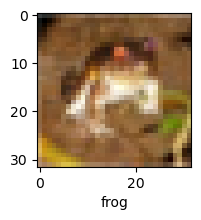

In [11]:
plot_sample(X_train, y_train, 0)


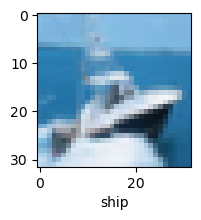

In [12]:
plot_sample(X_train, y_train, 8)

**To standardize the images, we scale their values to fall within the range of 0 to 1. Given that each image consists of three color channels (red, green, and blue), with values ranging from 0 to 255 for each channel, we achieve normalization by dividing each pixel value by 255. This process ensures that the pixel values are expressed as proportions within the 0 to 1 interval.**

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
'''# Define a Convolutional Neural Network (CNN) model architecture:
# - First convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation.
# - Max pooling layer with a pool size of (2, 2) for downsampling.
# - Second convolutional layer with 64 filters, each with a 3x3 kernel size, ReLU activation.
# - Another max pooling layer with a pool size of (2, 2) for further downsampling.
# - Flatten layer to convert 2D feature maps into a 1D vector.
# - Dense layer with 64 neurons and ReLU activation to learn complex patterns.
# - Final dense layer with 10 neurons and softmax activation for multi-class classification.
'''

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\ayoos\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
'''# Compile the CNN model:
# - Use the Adam optimizer, which is an efficient optimization algorithm for training neural networks.
# - Use sparse categorical crossentropy as the loss function since the labels are provided as integers.
# - Monitor model performance during training using accuracy as the evaluation metric.
'''

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.3509 - loss: 1.7683 - val_accuracy: 0.5420 - val_loss: 1.2945
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5781 - loss: 1.1954 - val_accuracy: 0.6242 - val_loss: 1.0964
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6390 - loss: 1.0292 - val_accuracy: 0.6411 - val_loss: 1.0339
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6767 - loss: 0.9244 - val_accuracy: 0.6561 - val_loss: 1.0012
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7030 - loss: 0.8568 - val_accuracy: 0.6600 - val_loss: 1.0016
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.7240 - loss: 0.7948 - val_accuracy: 0.6807 - val_loss: 0.9540
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7541 - loss: 0.7170 - val_accuracy: 0.6575 - val_loss: 1.0171
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7605 -

In [18]:
'''# Define the 2nd CNN model architecture:
# - First convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation.
# - Max pooling layer with a pool size of (2, 2) for downsampling.
# - Second convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation.
# - Another max pooling layer with a pool size of (2, 2) for further downsampling.
# - Third convolutional layer with 64 filters, each with a 3x3 kernel size, ReLU activation.
# - Another max pooling layer with a pool size of (2, 2) for further downsampling.
# - Flatten layer to convert 2D feature maps into a 1D vector.
# - Dense layer with 128 neurons and ReLU activation to learn complex patterns.
# - Dropout layer with a dropout rate of 0.5 for regularization to prevent overfitting.
# - Final dense layer with 10 neurons and softmax activation for multi-class classification.
'''

cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,826 (245.41 KB)

 Trainable params: 62,826 (245.41 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
cnn2.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
cnn2.fit(X_train, y_train, epochs=30, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.2690 - loss: 1.9369 - val_accuracy: 0.4719 - val_loss: 1.4258
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.4784 - loss: 1.4435 - val_accuracy: 0.5561 - val_loss: 1.2398
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5399 - loss: 1.2848 - val_accuracy: 0.5764 - val_loss: 1.1726
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5766 - loss: 1.1958 - val_accuracy: 0.5997 - val_loss: 1.1187
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6049 - loss: 1.1233 - val_accuracy: 0.6210 - val_loss: 1.0528
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6282 - loss: 1.0585 - val_accuracy: 0.6469 - val_loss: 0.9973
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6437 - loss: 1.0167 - val_accuracy: 0.6524 - val_loss: 0.9735
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6599 - loss: 0.9753 - 

In [22]:
'''# Define the 3rd CNN model architecture:
# - First convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation.
# - Max pooling layer with a pool size of (2, 2) for downsampling.
# - Second convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation.
# - Another max pooling layer with a pool size of (2, 2) for further downsampling.
# - Third convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation.
# - Another max pooling layer with a pool size of (2, 2) for further downsampling.
# - Flatten layer to convert 2D feature maps into a 1D vector.
# - Dense layer with 128 neurons and ReLU activation to learn complex patterns.
# - Dropout layer with a dropout rate of 0.5 for regularization to prevent overfitting.
# - Final dense layer with 10 neurons and softmax activation for multi-class classification.
'''
cnn3 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn3.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Import EarlyStopping callback from TensorFlow Keras callbacks module
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback:
# - Monitors the validation loss ('val_loss') during training.
# - Patience set to 8 epochs, meaning training will stop if validation loss does not improve
#   for 8 consecutive epochs.
# - The best weights of the model will be restored when training stops early.
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model with early stopping:
# - Fit the model to the training data with 30 epochs and a batch size of 64.
# - Validation data (X_test, y_test) is used to monitor model performance during training.
# - EarlyStopping callback is applied to stop training if validation loss does not improve.
cnn3.fit(X_train, y_train, epochs=30, batch_size=64,
                   validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.2518 - loss: 1.9640 - val_accuracy: 0.4707 - val_loss: 1.4419
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.4577 - loss: 1.4923 - val_accuracy: 0.5319 - val_loss: 1.3083
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5218 - loss: 1.3311 - val_accuracy: 0.5550 - val_loss: 1.2346
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5549 - loss: 1.2444 - val_accuracy: 0.5987 - val_loss: 1.1300
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5844 - loss: 1.1660 - val_accuracy: 0.6274 - val_loss: 1.0642
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6082 - loss: 1.1023 - val_accuracy: 0.6389 - val_loss: 1.0247
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6244 - loss: 1.0610 - val_accuracy: 0.6383 - val_loss: 1.0293
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6436 - loss: 1.0057 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test Accuracy: 0.7114999890327454
Precision: 0.7132083014601389
Recall: 0.7115
F1-score: 0.7109915026035447


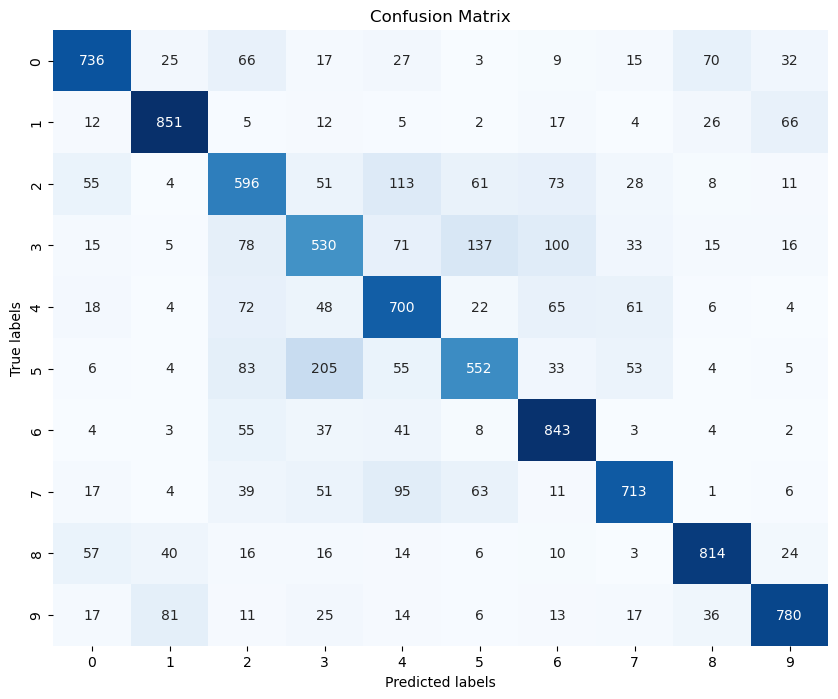

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn3.evaluate(X_test, y_test, verbose=0)


# Make predictions on the test set
y_pred_probabilities = cnn3.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)


# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualize confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**The reported evaluation metrics are as follows:**

Test Accuracy: This is the ratio of correctly predicted samples to the total number of samples in the test set. It indicates the overall correctness of the model's predictions on the test data. In this case, **the test accuracy is approximately 0.7115 or 71.15%.**

Precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. It measures the model's ability to correctly identify positive samples among all samples it predicted as positive. **A high precision indicates that the model tends to make fewer false positive predictions. Here, the precision is approximately 0.7132 or 71.32%.**

Recall: Recall, also known as sensitivity, is the ratio of true positive predictions to the total number of actual positive samples in the test set. It measures the model's ability to correctly identify positive samples among all actual positive samples. A high recall indicates that the model can capture a larger proportion of positive samples. **In this case, the recall is also approximately 0.7115 or 71.15%.**

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when the class distribution is imbalanced. **A high F1-score indicates good performance in both precision and recall. Here, the F1-score is approximately 0.7110 or 71.10%**